# Введение в машинное обучение для Java-разработчиков
### Практическое задание 1. Линейная регрессия
### Дата выдачи: 18.10.2023

### Дедлайн: 23:59MSK 01.11.2022

## О задании
В этом задании мы попытаемся разобраться в механизме линейной регрессии. 

## Оценивание и штрафы
Каждая из задач (помечены тегом [task]) имеет определенное количество баллов (указана в скобках около задачи). Максимально допустимая оценка за работу — 16 баллов. 

- от 4 до 9 баллов - оценка "3"
- от 10 до 16 баллов - оценка "4"
- 17 баллов - оценка "5"

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов, что автоматически ведет к несдаче курса. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в комментариях. 
В данном задании есть необязательные бонусные задания, выполнение которых добавляет баллы в карму :)

## Формат сдачи
Задания сдаются путем форка основного репозитория, коммита решения в мастер-ветку вашего форка и оповещении преподавателя о выполнении ДЗ. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

[[Укажите количество набранных баллов]]

## Часть 1. Одномерная линейная регрессия

Замечание: мы будем реализовывать линейную регрессию, при условии, что свободный коэффициент равен нулю

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn') 
sns.set('notebook', font_scale=1.25, style='whitegrid')

<ipython-input-12-1948dd02af1e>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### [task] Прокомментируйте каждую строчку кода в функции create_dataset (1 балл)

In [3]:
def create_dataset(n, slope, noise_stddev, random_state=0):
    # RandomState используется для генерации псевдослучайных чисел.При этом при одинаковом seed, он будет возвращать все время одинаковые значения.
    random_state = np.random.RandomState(int(random_state))
    #linspace возвращает n чисел равномерно распределенные в заданном интервале
    x_n = np.linspace(-2, 2, n)
    #здесь мы генерируем значения по y, при этом slope(угол наклона прямой) всегда одинаковый, что характерно для одномерной линейной регрессии
    y_n = slope * x_n + random_state.randn(n) * noise_stddev
    return x_n, y_n

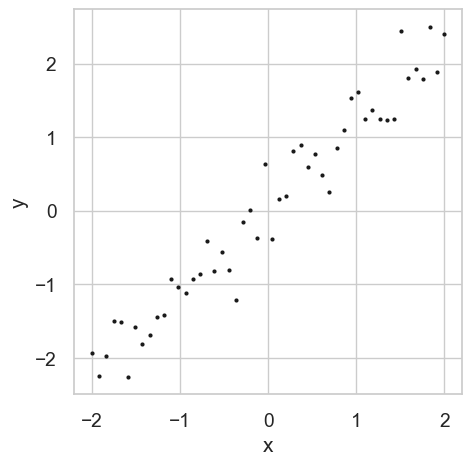

In [4]:
x, y = create_dataset(n=50, slope=1.234, noise_stddev=0.3)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
plt.plot(x, y, 'k.');
plt.xlabel('x');
plt.ylabel('y');

### [task] Реализуйте функции расчета результата 1-мерной линейной модели и MSE (1 балл за каждую фунцкию)

In [19]:
def predict_1d(x, w):
    return x * w

def calc_mean_squared_error(yhat_N, y_N):
    return np.mean((yhat_N - y_N)**2)

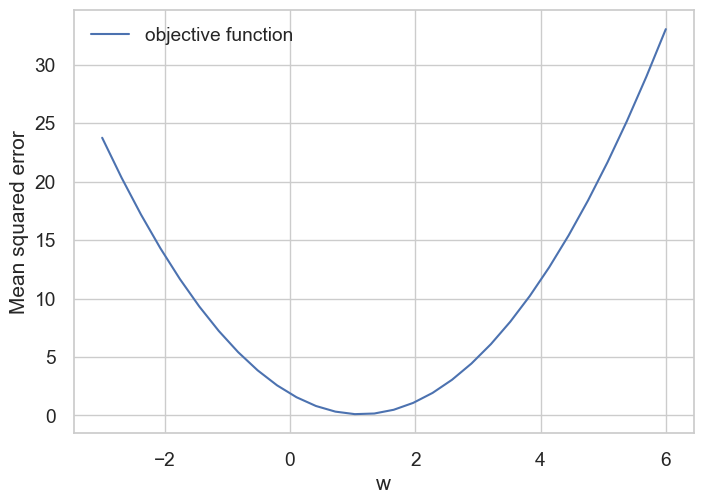

In [20]:
G = 30
w_candidates_G = np.linspace(-3, 6, G)
error_G = np.zeros(G)
for i, w in enumerate(w_candidates_G):
    yhat_N = predict_1d(x, w)
    error_G[i] = calc_mean_squared_error(yhat_N, y)
plt.plot(w_candidates_G, error_G, label='objective function');
plt.xlabel('w');
plt.ylabel('Mean squared error');
plt.legend()

### [task] Найдите методом пристального взгляда по графику из прошлого пункта оптимальное значение параметра w и подставьте найденное значение в переменную w (1 балл)

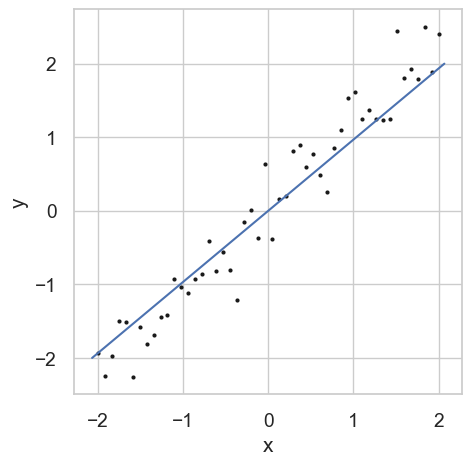

In [22]:
w = w_candidates_G[np.argmin(error_G)] # Fix me 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
plt.plot(x, y, 'k.');
plt.plot([predict_1d(-2,w), predict_1d(2,w)], [-2,2])
plt.xlabel('x');
plt.ylabel('y');

### [task] Что происходит с линейной моделью, когда меняется параметр w (1 балл)?
В нашем случае нашая линейная модель имеет вид a(x)=<w, x>(intercept = 0).Меняя параметр w, мы меняем угол наклона нашей регрессии  
Таким образом,

## Часть 2. Градиентный спуск

### [task] Реализуйте функцию потерь RSS (1 балл)

In [ ]:
def calc_loss(x, y, w):
    pass 

### [task] Реализуйте функцию расчета градиента (2 балл)

hint: Продифференцируйте функцию потерь RSS

In [ ]:
def calc_grad(x, y, w):
    pass

### [task] Допишите код для обновления весов (2 балла)

In [ ]:
def minimize_via_grad_descent(calc_loss, calc_grad, init_w=0.0, step_size=0.001, max_iters=20):
    w = init_w 
    grad = calc_grad(x, y, w)
    for iter_id in range(max_iters):
        # hint: Вспомните, что означает градиент
        # Your code here
        print(f"Loss = {loss}, grad = {grad}, w = {w}") 
    wopt = w    
    return wopt

In [ ]:
wopt = minimize_via_grad_descent(calc_loss, calc_grad, step_size=0.001, max_iters=50);

In [ ]:
w = wopt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
plt.plot(x, y, 'k.');
plt.plot([predict_1d(-2,w), predict_1d(2,w)], [-2,2])
plt.xlabel('x');
plt.ylabel('y');

### [task] Что будет если сделать слишком маленький шаг или слишком большой (1 балл)
hint: Попробуйте увеличить число итераций

## Часть 3. 

В данной части мы будем учиться использовать готовую реализацию линейной регрессии из библиотеки scikit-learn на небольшой, но реальной задаче из медицины. Обязательно изучите описание датасета (признаки и целевая переменная).

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes(as_frame=True)
data = diabetes["frame"]
print(diabetes["DESCR"])

In [ ]:
X = data.drop(labels='target', axis=1) 
y = data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

### [task] Напишите код для обучения модели и предсказания модели на тестовой выборке (2 балла)
Чтобы выполнить задание, воспользуйтесь документацией для класса SGDRegressor

In [ ]:
model = SGDRegressor()
# your code here
#
#
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

### [task] Попробуйте улучшить результат за счет изменения гиперпараметров линейной модели (2 балла)

In [ ]:
# your code here
#
#

### Какие признаки больше всего влияют на целевую переменную? Выберите 3 признака. (2 балла)
hint: посмотрите на полученные веса модели

In [ ]:
# your code here
#
#

# Бонусные вопросы:
- Если вы нашли признаки, которые наибольшим образом влияют на модель, проверьте согласуется ли это с медициной в реальности ?
- Есть ли какие-то проблемы в текущей схеме обучения и валидации модели? 

Ответы пишите в ячейке ниже

In [ ]:
#